# Importar Librerias

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
!pip install matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


## Leer Archivo csv con la información

In [2]:
df = pd.read_csv("tercer_intento.csv",sep=";")
df

,Id de evento,Tipo,Fecha Evento,Título evento,Descripcion y Resumen Evento,Categorias,Subcategorias,Doble/Multiple Afectacion,Resolucion 1612,Resolucion 1820,...,Ocupacion,Etnia,Grupo poblacional,Edad,Estado,Condicion,Fecha de fuente,Tipo de fuente,Nombre de fuente,Fuente
0,1,Violencia,2024-01-03T00:00:00,Un soldado muerto y 12 heridos en ataque del C...,.Antioquia-Turbo-miércoles 3 enero 2024,Acciones armadas,Emboscada,No,No,No,...,Combatiente,Sin información,Población en general,Mayor de 18 años,Muerto,Militar,3/01/2024,Prensa,El Tiempo,https://www.eltiempo.com/colombia/medellin/ant...
1,2,Violencia,2024-01-03T00:00:00,Un soldado muerto y 12 heridos en ataque del C...,.Antioquia-Turbo-miércoles 3 enero 2024,Acciones armadas,Emboscada,No,No,No,...,Combatiente,Sin información,Población en general,Mayor de 18 años,Herido,Militar,3/01/2024,Prensa,El Tiempo,https://www.eltiempo.com/colombia/medellin/ant...
2,3,Violencia,2024-01-01T00:00:00,Asesinan a migrante venezolana en Medellín,.Antioquia-Medellín-lunes 1 enero 2024,Ataques contra la población civil,Homicidio intencional en persona protegida,No,No,Si,...,Desconocida,Sin información,Extranjero - Refugiado y Migrante (Venezolano),Mayor de 18 años,Muerto,Civil,2/01/2024,Prensa,Alerta Paisa,https://www.alertapaisa.com/noticias/valle-de-...
3,4,Violencia,2024-01-01T00:00:00,"Asesinan a un hombre en Copacabana, Antioquia",.Antioquia-Copacabana-lunes 1 enero 2024,Ataques contra la población civil,Homicidio intencional en persona protegida,No,No,No,...,Desconocida,Sin información,Población en general,Mayor de 18 años,Muerto,Civil,2/01/2024,Sociedad Civil,Analisisurbano.org,https://analisisurbano.org/lo-mataron-por-defe...
4,5,Violencia,2024-01-01T00:00:00,"Asesinan a un hombre en Girardota, Antioquia",.Antioquia-Girardota-lunes 1 enero 2024,Ataques contra la población civil,Homicidio intencional en persona protegida,No,No,No,...,Desconocida,Sin información,Población en general,Mayor de 18 años,Muerto,Desconocido,2/01/2024,Sociedad Civil,Analisisurbano.org,https://analisisurbano.org/a-oscar-javier-lo-m...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1893,1894,Violencia,2024-06-25T00:00:00,"Comercio en corregimiento de El Bagre, Antioqu...",.Antioquia-El Bagre-martes 25 junio 2024,Ataques contra la población civil,Amenazas (individuales/colectivas),No,No,No,...,Comerciante,Sin información,Población en general,Mayor de 18 años,No aplica,Civil,25/06/2024,Radio,Caracol,https://caracol.com.co/2024/06/25/comercio-en-...
1894,1895,Violencia,2024-06-25T00:00:00,"Comercio en corregimiento de El Bagre, Antioqu...",.Antioquia-El Bagre-martes 25 junio 2024,Restricción al acceso humanitario,"Restricciones a la movilidad y sobre, u obstru...",No,No,No,...,Desconocida,Sin información,Población en general,Sin información,No aplica,Civil,25/06/2024,Radio,Caracol,https://caracol.com.co/2024/06/25/comercio-en-...
1895,1896,Violencia,2024-06-24T00:00:00,Dos jovenes fueron secuestrados por el clan de...,.Antioquia-Segovia-lunes 24 junio 2024,Ataques contra la población civil,Secuestro,No,No,No,...,Desconocida,Sin información,Población en general,Mayor de 18 años,Desconocido,Civil,24/06/2024,Radio,Caracol,https://caracol.com.co/2024/06/25/ellos-son-lo...
1896,1897,Violencia,2024-06-12T00:00:00,Confinamiento de poblaciones indigenas en Conv...,.Norte De Santander-Convención-miércoles 12 ju...,Restricción al acceso humanitario,Confinamiento/Bloqueo de comunidades,No,No,No,...,Otro,Indígena-Bari,Extranjero - Indígena binacional o plurinacional,Mayor de 18 años,No aplica,Desconocido,25/06/2024,Equipos Locales de Coordinación - ELC,ELC Norte de Santander,Sin Enlace


# Valores unicos
>Identificar mayores y menores de edad

>Contar quienes valores únicos

In [3]:
df["Edad"].unique()

array(['Mayor de 18 años', 'Sin información', 'Desconocido',
       'Menor de 18 años'], dtype=object)

In [4]:
df["Edad"].value_counts()

Edad
Mayor de 18 años    925
Sin información     679
Menor de 18 años    212
Desconocido          82
Name: count, dtype: int64

>Categorizar

In [5]:
maping = {"Mayor de 18 años":1,"Sin información":1,"Menor de 18 años":0,"Desconocido":1}
cam = df["Edad"].replace(maping)
cam

C:\Users\dafer\AppData\Local\Temp\ipykernel_10732\138014621.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cam = df["Edad"].replace(maping)


0       1
1       1
2       1
3       1
4       1
       ..
1893    1
1894    1
1895    1
1896    1
1897    1
Name: Edad, Length: 1898, dtype: int64

## Cambio en los datos

In [6]:
df["Fecha Evento"] = pd.to_datetime(df["Fecha Evento"])
df["Longitud"] = pd.to_numeric(df["Longitud"])
df["Latitud"] = pd.to_numeric(df["Latitud"])
df["Edad"] = pd.to_numeric(cam)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Id de evento                  1898 non-null   int64         
 1   Tipo                          1898 non-null   object        
 2   Fecha Evento                  1898 non-null   datetime64[ns]
 3   Título evento                 1898 non-null   object        
 4   Descripcion y Resumen Evento  1896 non-null   object        
 5   Categorias                    1898 non-null   object        
 6   Subcategorias                 1898 non-null   object        
 7   Doble/Multiple Afectacion     1898 non-null   object        
 8   Resolucion 1612               1898 non-null   object        
 9   Resolucion 1820               1898 non-null   object        
 10  Departmento                   1898 non-null   object        
 11  Municipio                     

In [7]:
df.describe

<bound method NDFrame.describe of       Id de evento       Tipo Fecha Evento  \
0                1  Violencia   2024-01-03   
1                2  Violencia   2024-01-03   
2                3  Violencia   2024-01-01   
3                4  Violencia   2024-01-01   
4                5  Violencia   2024-01-01   
...            ...        ...          ...   
1893          1894  Violencia   2024-06-25   
1894          1895  Violencia   2024-06-25   
1895          1896  Violencia   2024-06-24   
1896          1897  Violencia   2024-06-12   
1897          1898  Violencia   2024-06-25   

                                          Título evento  \
0     Un soldado muerto y 12 heridos en ataque del C...   
1     Un soldado muerto y 12 heridos en ataque del C...   
2            Asesinan a migrante venezolana en Medellín   
3         Asesinan a un hombre en Copacabana, Antioquia   
4          Asesinan a un hombre en Girardota, Antioquia   
...                                                 ...   


In [8]:
df["Categorias"].value_counts(ascending=False,dropna=False)

Categorias
Ataques contra la población civil        967
Acciones armadas                         340
Restricción al acceso humanitario        233
Desplazamiento forzado                   189
Uso de artefactos explosivos             112
Ataque a objetivos ilícitos de guerra     32
Categorías Complementarias                23
Temporada de lluvías                       2
Name: count, dtype: int64

In [9]:
df["Subcategorias"].value_counts(ascending=False,dropna=False)

Subcategorias
Homicidio intencional en persona protegida                                                                             434
Desplazamientos masivos                                                                                                153
Amenazas (individuales/colectivas)                                                                                     153
Confinamiento/Bloqueo de comunidades                                                                                   110
Enfrentamiento entre actores no estatales                                                                              109
Secuestro                                                                                                              105
Combates                                                                                                               103
Atentado                                                                                                                81
Ho

In [10]:
df.dtypes.value_counts()

object            20
int64              4
float64            2
datetime64[ns]     1
Name: count, dtype: int64

## Conteo de variables y agrupación

In [11]:
acciones_armadas = df.groupby("Municipio")["Categorias"].agg(["count"])
acciones_armadas.sort_values(ascending=False,by="count")

,count
Municipio,
Tame,84
Argelia,47
Cumbitara,45
Cúcuta,43
Arauquita,35
...,...
Puerto Nariño,1
Puerto López,1
Concordia,1


In [12]:
acciones_armadas = df.groupby("Municipio")["Edad"].agg(["sum"])
acciones_armadas.sort_values(ascending=False,by="sum")

,sum
Municipio,
Tame,74
Cumbitara,43
Argelia,43
Cúcuta,42
Quibdó,33
...,...
Puerto Wilches,0
Guadalupe,0
Campoalegre,0


In [13]:
df.shape

(1898, 27)

## Tratamiento de datos

In [14]:
df.isnull().any()

Id de evento                    False
Tipo                            False
Fecha Evento                    False
Título evento                   False
Descripcion y Resumen Evento     True
Categorias                      False
Subcategorias                   False
Doble/Multiple Afectacion       False
Resolucion 1612                 False
Resolucion 1820                 False
Departmento                     False
Municipio                       False
Latitud                         False
Longitud                        False
Numero de afectados             False
Genero                          False
Familia                         False
Ocupacion                       False
Etnia                           False
Grupo poblacional               False
Edad                            False
Estado                          False
Condicion                       False
Fecha de fuente                 False
Tipo de fuente                  False
Nombre de fuente                False
Fuente      

In [15]:
df.isnull().sum().sort_values(ascending=False)

Descripcion y Resumen Evento    2
Id de evento                    0
Numero de afectados             0
Nombre de fuente                0
Tipo de fuente                  0
Fecha de fuente                 0
Condicion                       0
Estado                          0
Edad                            0
Grupo poblacional               0
Etnia                           0
Ocupacion                       0
Familia                         0
Genero                          0
Longitud                        0
Tipo                            0
Latitud                         0
Municipio                       0
Departmento                     0
Resolucion 1820                 0
Resolucion 1612                 0
Doble/Multiple Afectacion       0
Subcategorias                   0
Categorias                      0
Título evento                   0
Fecha Evento                    0
Fuente                          0
dtype: int64

In [16]:
df.isnull().sum().sum()

2

c:\Users\dafer\Documents\13_udemy\03_codigo\venv\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\dafer\Documents\13_udemy\03_codigo\venv\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\dafer\Documents\13_udemy\03_codigo\venv\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


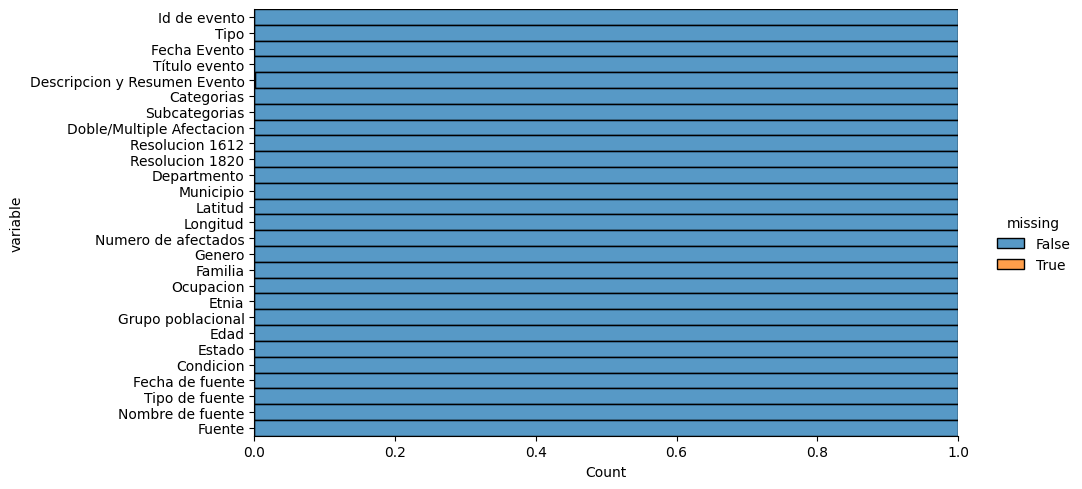

In [17]:
(df.isnull().melt(value_name='missing').pipe(lambda df: (sns.displot(data=df,y='variable',hue='missing',multiple='fill',aspect=2))))

In [18]:
df = (df.dropna())
df

,Id de evento,Tipo,Fecha Evento,Título evento,Descripcion y Resumen Evento,Categorias,Subcategorias,Doble/Multiple Afectacion,Resolucion 1612,Resolucion 1820,...,Ocupacion,Etnia,Grupo poblacional,Edad,Estado,Condicion,Fecha de fuente,Tipo de fuente,Nombre de fuente,Fuente
0,1,Violencia,2024-01-03,Un soldado muerto y 12 heridos en ataque del C...,.Antioquia-Turbo-miércoles 3 enero 2024,Acciones armadas,Emboscada,No,No,No,...,Combatiente,Sin información,Población en general,1,Muerto,Militar,3/01/2024,Prensa,El Tiempo,https://www.eltiempo.com/colombia/medellin/ant...
1,2,Violencia,2024-01-03,Un soldado muerto y 12 heridos en ataque del C...,.Antioquia-Turbo-miércoles 3 enero 2024,Acciones armadas,Emboscada,No,No,No,...,Combatiente,Sin información,Población en general,1,Herido,Militar,3/01/2024,Prensa,El Tiempo,https://www.eltiempo.com/colombia/medellin/ant...
2,3,Violencia,2024-01-01,Asesinan a migrante venezolana en Medellín,.Antioquia-Medellín-lunes 1 enero 2024,Ataques contra la población civil,Homicidio intencional en persona protegida,No,No,Si,...,Desconocida,Sin información,Extranjero - Refugiado y Migrante (Venezolano),1,Muerto,Civil,2/01/2024,Prensa,Alerta Paisa,https://www.alertapaisa.com/noticias/valle-de-...
3,4,Violencia,2024-01-01,"Asesinan a un hombre en Copacabana, Antioquia",.Antioquia-Copacabana-lunes 1 enero 2024,Ataques contra la población civil,Homicidio intencional en persona protegida,No,No,No,...,Desconocida,Sin información,Población en general,1,Muerto,Civil,2/01/2024,Sociedad Civil,Analisisurbano.org,https://analisisurbano.org/lo-mataron-por-defe...
4,5,Violencia,2024-01-01,"Asesinan a un hombre en Girardota, Antioquia",.Antioquia-Girardota-lunes 1 enero 2024,Ataques contra la población civil,Homicidio intencional en persona protegida,No,No,No,...,Desconocida,Sin información,Población en general,1,Muerto,Desconocido,2/01/2024,Sociedad Civil,Analisisurbano.org,https://analisisurbano.org/a-oscar-javier-lo-m...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1893,1894,Violencia,2024-06-25,"Comercio en corregimiento de El Bagre, Antioqu...",.Antioquia-El Bagre-martes 25 junio 2024,Ataques contra la población civil,Amenazas (individuales/colectivas),No,No,No,...,Comerciante,Sin información,Población en general,1,No aplica,Civil,25/06/2024,Radio,Caracol,https://caracol.com.co/2024/06/25/comercio-en-...
1894,1895,Violencia,2024-06-25,"Comercio en corregimiento de El Bagre, Antioqu...",.Antioquia-El Bagre-martes 25 junio 2024,Restricción al acceso humanitario,"Restricciones a la movilidad y sobre, u obstru...",No,No,No,...,Desconocida,Sin información,Población en general,1,No aplica,Civil,25/06/2024,Radio,Caracol,https://caracol.com.co/2024/06/25/comercio-en-...
1895,1896,Violencia,2024-06-24,Dos jovenes fueron secuestrados por el clan de...,.Antioquia-Segovia-lunes 24 junio 2024,Ataques contra la población civil,Secuestro,No,No,No,...,Desconocida,Sin información,Población en general,1,Desconocido,Civil,24/06/2024,Radio,Caracol,https://caracol.com.co/2024/06/25/ellos-son-lo...
1896,1897,Violencia,2024-06-12,Confinamiento de poblaciones indigenas en Conv...,.Norte De Santander-Convención-miércoles 12 ju...,Restricción al acceso humanitario,Confinamiento/Bloqueo de comunidades,No,No,No,...,Otro,Indígena-Bari,Extranjero - Indígena binacional o plurinacional,1,No aplica,Desconocido,25/06/2024,Equipos Locales de Coordinación - ELC,ELC Norte de Santander,Sin Enlace


In [19]:
df.describe(include="all")

,Id de evento,Tipo,Fecha Evento,Título evento,Descripcion y Resumen Evento,Categorias,Subcategorias,Doble/Multiple Afectacion,Resolucion 1612,Resolucion 1820,...,Ocupacion,Etnia,Grupo poblacional,Edad,Estado,Condicion,Fecha de fuente,Tipo de fuente,Nombre de fuente,Fuente
count,1896.000000,1896,1896,1896,1896,1896,1896,1896,1896,1896,...,1896,1896,1896,1896.000000,1896,1896,1896,1896,1896,1896
unique,NaN,1,NaN,1223,1157,8,40,2,2,2,...,28,37,7,NaN,4,5,199,25,143,896
top,NaN,Violencia,NaN,Incursión armada de GANE en Tame,.Arauca-Tame-domingo 31 marzo 2024,Ataques contra la población civil,Homicidio intencional en persona protegida,No,No,No,...,Sin Información,Sin información,Población en general,NaN,No aplica,Civil,5/04/2024,Prensa,Alcaldía,Sin Enlace
freq,NaN,1896,NaN,19,19,965,433,1807,1287,1891,...,857,1586,1020,NaN,986,903,37,754,226,559
mean,949.906646,NaN,2024-03-21 13:16:42.531645696,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.888186,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,2024-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,475.750000,NaN,2024-02-10 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,949.500000,NaN,2024-03-16 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,1424.250000,NaN,2024-05-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
max,1898.000000,NaN,2024-06-25 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
df.describe(include=[np.number])

,Id de evento,Latitud,Longitud,Numero de afectados,Familia,Edad
count,1896.000000,1896.000000,1896.000000,1896.000000,1896.000000,1896.000000
mean,949.906646,4.605093,-75.269698,139.219409,17.710970,0.888186
std,548.015991,2.861111,2.159865,871.907237,111.239179,0.315221
min,1.000000,-4.215000,-78.764722,0.000000,0.000000,0.000000
25%,475.750000,2.115278,-76.693611,1.000000,0.000000,1.000000
50%,949.500000,4.446111,-75.993056,1.000000,0.000000,1.000000
75%,1424.250000,7.026111,-73.866667,3.000000,0.000000,1.000000
max,1898.000000,11.544167,-67.483742,15000.000000,2800.000000,1.000000


In [21]:
df.describe(include=object)

,Tipo,Título evento,Descripcion y Resumen Evento,Categorias,Subcategorias,Doble/Multiple Afectacion,Resolucion 1612,Resolucion 1820,Departmento,Municipio,Genero,Ocupacion,Etnia,Grupo poblacional,Estado,Condicion,Fecha de fuente,Tipo de fuente,Nombre de fuente,Fuente
count,1896,1896,1896,1896,1896,1896,1896,1896,1896,1896,1896,1896,1896,1896,1896,1896,1896,1896,1896,1896
unique,1,1223,1157,8,40,2,2,2,26,275,4,28,37,7,4,5,199,25,143,896
top,Violencia,Incursión armada de GANE en Tame,.Arauca-Tame-domingo 31 marzo 2024,Ataques contra la población civil,Homicidio intencional en persona protegida,No,No,No,Cauca,Tame,Masculino,Sin Información,Sin información,Población en general,No aplica,Civil,5/04/2024,Prensa,Alcaldía,Sin Enlace
freq,1896,19,19,965,433,1807,1287,1891,306,84,900,857,1586,1020,986,903,37,754,226,559


In [22]:
df.astype(
    {
        "Categorias":"category",
        "Subcategorias":"category",
        "Condicion":"category"
    }
).describe(include=["category",object])

,Tipo,Título evento,Descripcion y Resumen Evento,Categorias,Subcategorias,Doble/Multiple Afectacion,Resolucion 1612,Resolucion 1820,Departmento,Municipio,Genero,Ocupacion,Etnia,Grupo poblacional,Estado,Condicion,Fecha de fuente,Tipo de fuente,Nombre de fuente,Fuente
count,1896,1896,1896,1896,1896,1896,1896,1896,1896,1896,1896,1896,1896,1896,1896,1896,1896,1896,1896,1896
unique,1,1223,1157,8,40,2,2,2,26,275,4,28,37,7,4,5,199,25,143,896
top,Violencia,Incursión armada de GANE en Tame,.Arauca-Tame-domingo 31 marzo 2024,Ataques contra la población civil,Homicidio intencional en persona protegida,No,No,No,Cauca,Tame,Masculino,Sin Información,Sin información,Población en general,No aplica,Civil,5/04/2024,Prensa,Alcaldía,Sin Enlace
freq,1896,19,19,965,433,1807,1287,1891,306,84,900,857,1586,1020,986,903,37,754,226,559


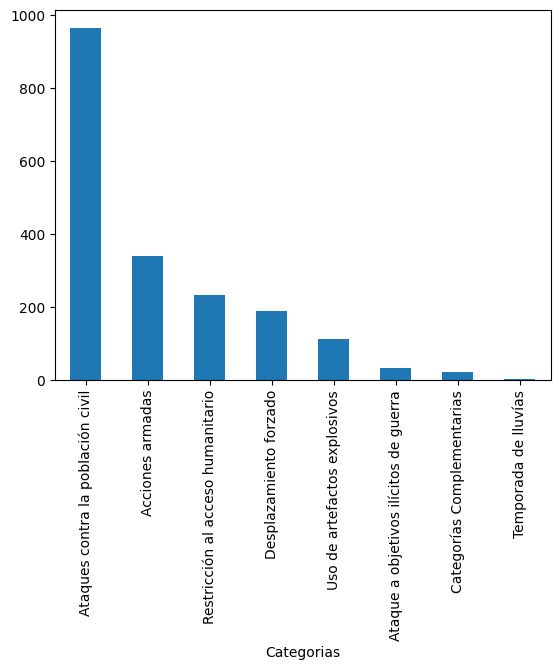

In [23]:
df.Categorias.value_counts().plot(kind="bar");

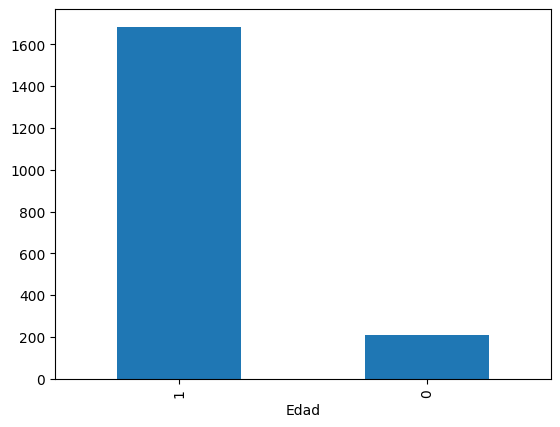

In [24]:
df.Edad.value_counts().plot(kind="bar");

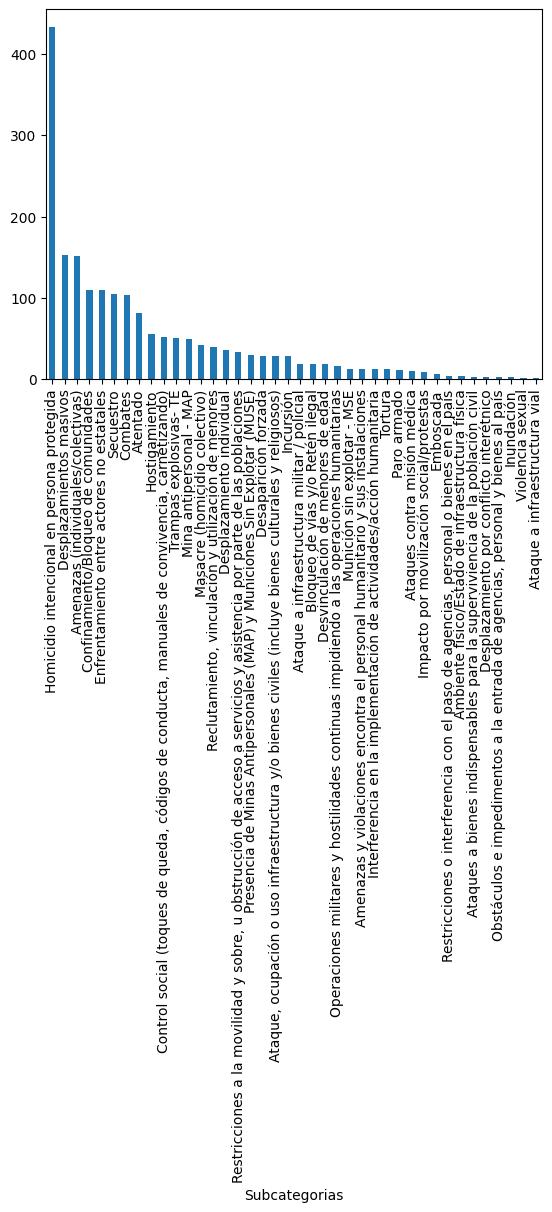

In [25]:
df.Subcategorias.value_counts().plot(kind="bar");

# Uso de la libreria Geopandas

In [26]:
import geopandas as gpd

In [27]:
gdf = gpd.GeoDataFrame(df,geometry=gpd.points_from_xy(df.Longitud,df.Latitud),crs='EPSG:4326')
gdf.head()

,Id de evento,Tipo,Fecha Evento,Título evento,Descripcion y Resumen Evento,Categorias,Subcategorias,Doble/Multiple Afectacion,Resolucion 1612,Resolucion 1820,...,Etnia,Grupo poblacional,Edad,Estado,Condicion,Fecha de fuente,Tipo de fuente,Nombre de fuente,Fuente,geometry
0,1,Violencia,2024-01-03,Un soldado muerto y 12 heridos en ataque del C...,.Antioquia-Turbo-miércoles 3 enero 2024,Acciones armadas,Emboscada,No,No,No,...,Sin información,Población en general,1,Muerto,Militar,3/01/2024,Prensa,El Tiempo,https://www.eltiempo.com/colombia/medellin/ant...,POINT (-76.72833 8.09306)
1,2,Violencia,2024-01-03,Un soldado muerto y 12 heridos en ataque del C...,.Antioquia-Turbo-miércoles 3 enero 2024,Acciones armadas,Emboscada,No,No,No,...,Sin información,Población en general,1,Herido,Militar,3/01/2024,Prensa,El Tiempo,https://www.eltiempo.com/colombia/medellin/ant...,POINT (-76.72833 8.09306)
2,3,Violencia,2024-01-01,Asesinan a migrante venezolana en Medellín,.Antioquia-Medellín-lunes 1 enero 2024,Ataques contra la población civil,Homicidio intencional en persona protegida,No,No,Si,...,Sin información,Extranjero - Refugiado y Migrante (Venezolano),1,Muerto,Civil,2/01/2024,Prensa,Alerta Paisa,https://www.alertapaisa.com/noticias/valle-de-...,POINT (-75.57483 6.24475)
3,4,Violencia,2024-01-01,"Asesinan a un hombre en Copacabana, Antioquia",.Antioquia-Copacabana-lunes 1 enero 2024,Ataques contra la población civil,Homicidio intencional en persona protegida,No,No,No,...,Sin información,Población en general,1,Muerto,Civil,2/01/2024,Sociedad Civil,Analisisurbano.org,https://analisisurbano.org/lo-mataron-por-defe...,POINT (-75.51028 6.34861)
4,5,Violencia,2024-01-01,"Asesinan a un hombre en Girardota, Antioquia",.Antioquia-Girardota-lunes 1 enero 2024,Ataques contra la población civil,Homicidio intencional en persona protegida,No,No,No,...,Sin información,Población en general,1,Muerto,Desconocido,2/01/2024,Sociedad Civil,Analisisurbano.org,https://analisisurbano.org/a-oscar-javier-lo-m...,POINT (-75.44611 6.37694)


<Axes: >

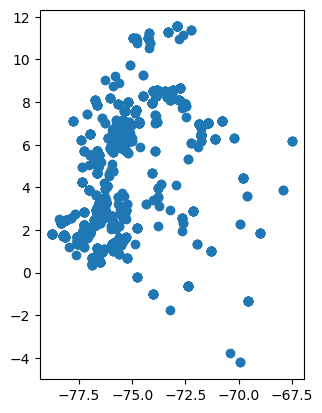

In [28]:
gdf.plot()

In [29]:
deptos = gpd.read_file(r"C:\Users\dafer\Documents\13_udemy\16_geo_cositas\01_geopandas\shape\Departamentos.zip")
new_crxs = 'EPSG:4326'
deptos_reproject = deptos.to_crs(new_crxs)

<Axes: >

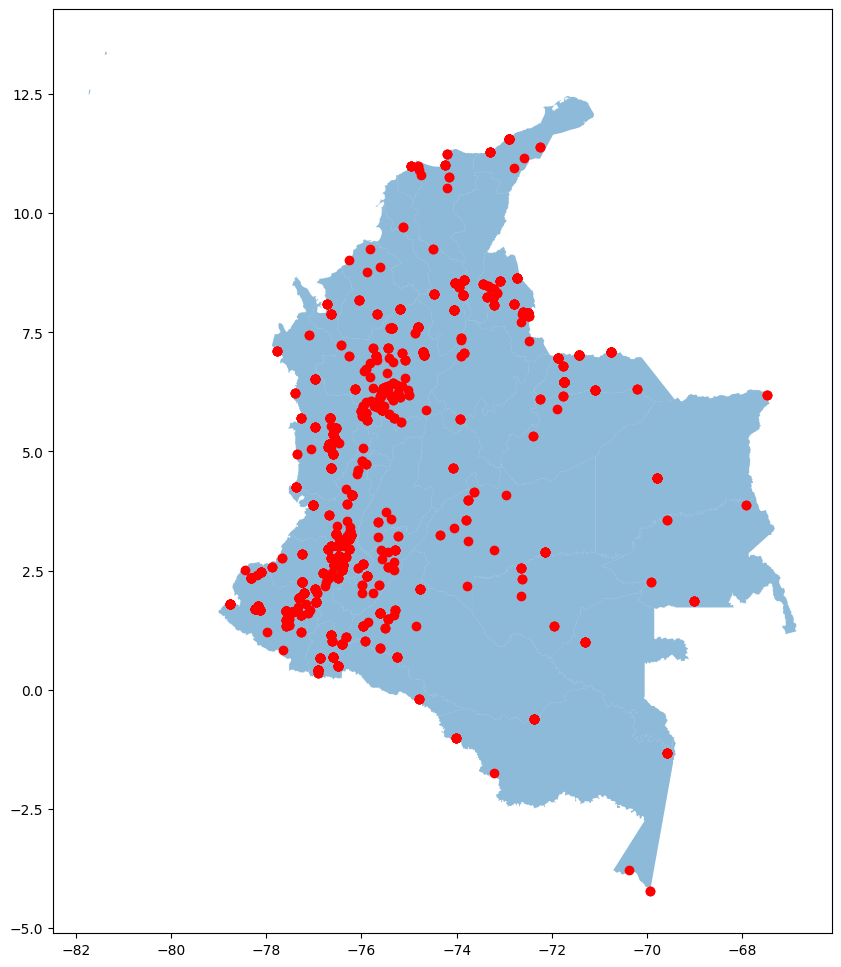

In [30]:
axis = deptos_reproject.plot(figsize=(20,12),alpha=0.5)
gdf.plot(ax=axis,color="red")

# Realizar un análisis de variables y aplicar lo aprendido evitando sesgos

sns.scatterplot(
    datagdff,
    xNumero de afectadosmm',
    Fecha Evento_mm'
)

<Axes: xlabel='Fecha Evento', ylabel='Numero de afectados'>

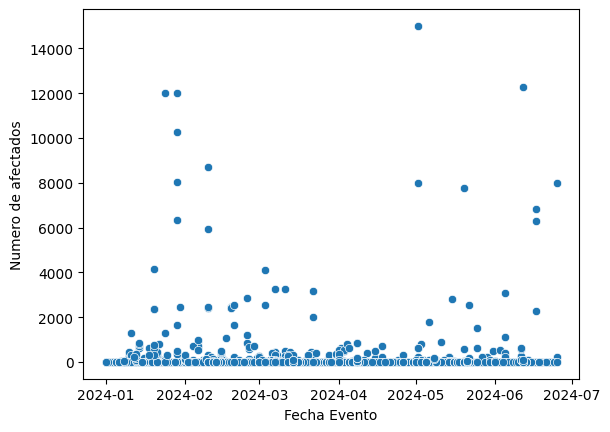

In [31]:
sns.scatterplot(
    data=gdf,
    x='Fecha Evento',
    y='Numero de afectados'
)

In [32]:
acciones_armadas_victimas = df.groupby("Fecha Evento")["Numero de afectados"].agg(["sum"])
#acciones_armadas_victimas.sort_values(ascending=False,by="sum")
acciones_armadas_fecha = df.groupby("Fecha Evento")["Subcategorias"].agg(["count"])
acc_dep = df.groupby("Departmento")["Fecha Evento"]
acc = pd.DataFrame(acc_dep)
#acciones_armadas_fecha.sort_values(ascending=False,by="count")

In [33]:
df_conteo = pd.DataFrame()
df_conteo["acciones_fecha"]= acciones_armadas_fecha
df_conteo["acciones_victimas"]= acciones_armadas_victimas
df_conteo["dpto"] = acc[0][0]
df_conteo.head()

,acciones_fecha,acciones_victimas,dpto
Fecha Evento,,,
2024-01-01,8,9,Amazonas
2024-01-02,7,8,Amazonas
2024-01-03,10,22,Amazonas
2024-01-04,4,5,Amazonas
2024-01-05,8,7,Amazonas


In [34]:
df_conteo.describe

<bound method NDFrame.describe of               acciones_fecha  acciones_victimas      dpto
Fecha Evento                                             
2024-01-01                 8                  9  Amazonas
2024-01-02                 7                  8  Amazonas
2024-01-03                10                 22  Amazonas
2024-01-04                 4                  5  Amazonas
2024-01-05                 8                  7  Amazonas
...                      ...                ...       ...
2024-06-21                 9                 23  Amazonas
2024-06-22                 2                  1  Amazonas
2024-06-23                 3                  7  Amazonas
2024-06-24                 3                  3  Amazonas
2024-06-25                 3               8207  Amazonas

[177 rows x 3 columns]>

In [35]:
df_conteo.describe(include=object)

,dpto
count,177
unique,1
top,Amazonas
freq,177


In [36]:
df_conteo.std

<bound method DataFrame.std of               acciones_fecha  acciones_victimas      dpto
Fecha Evento                                             
2024-01-01                 8                  9  Amazonas
2024-01-02                 7                  8  Amazonas
2024-01-03                10                 22  Amazonas
2024-01-04                 4                  5  Amazonas
2024-01-05                 8                  7  Amazonas
...                      ...                ...       ...
2024-06-21                 9                 23  Amazonas
2024-06-22                 2                  1  Amazonas
2024-06-23                 3                  7  Amazonas
2024-06-24                 3                  3  Amazonas
2024-06-25                 3               8207  Amazonas

[177 rows x 3 columns]>

In [37]:
acciones_armadas_fecha = df.groupby("Fecha Evento")["Categorias"].agg(["count"])
acciones_armadas_fecha.sort_values(ascending=False,by="count")


,count
Fecha Evento,
2024-03-07,43
2024-04-01,29
2024-05-20,28
2024-04-05,27
2024-02-26,26
...,...
2024-06-07,2
2024-06-22,2
2024-03-09,2


<Axes: xlabel='acciones_fecha', ylabel='acciones_victimas'>

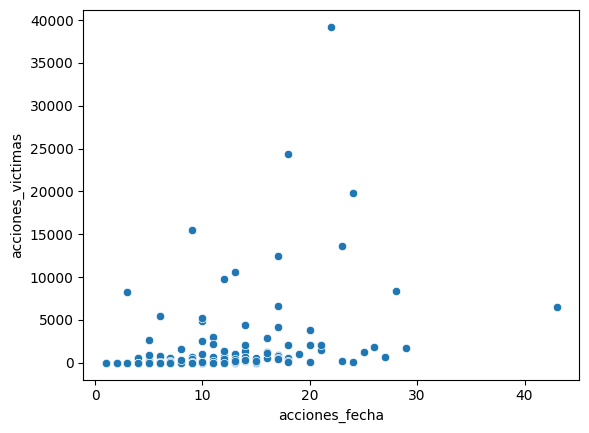

In [38]:
sns.scatterplot(
    data=df_conteo,
    x='acciones_fecha',
    y='acciones_victimas'
)

<Axes: xlabel='acciones_fecha', ylabel='acciones_victimas'>

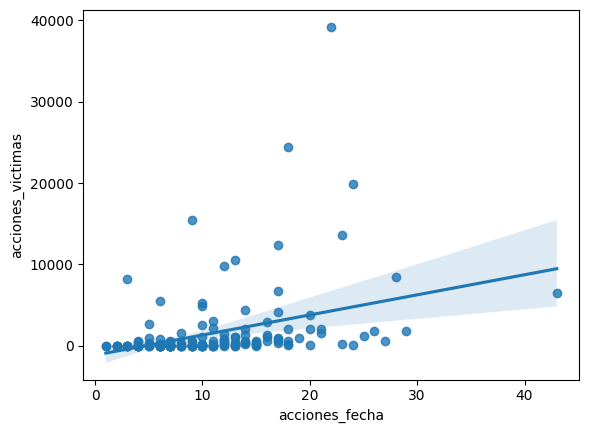

In [39]:
sns.regplot(
    data=df_conteo,
    x='acciones_fecha',
    y='acciones_victimas'
)

In [40]:
lista = gdf["Categorias"].unique().tolist()
lista

['Acciones armadas',
 'Ataques contra la población civil',
 'Restricción al acceso humanitario',
 'Uso de artefactos explosivos',
 'Desplazamiento forzado',
 'Ataque a objetivos ilícitos de guerra',
 'Categorías Complementarias',
 'Temporada de lluvías']

In [41]:
gdf_violnecia = gpd.GeoDataFrame()
gdf_violnecia["geometry"] = gdf.geometry
gdf_violnecia["victimas"] = gdf["Numero de afectados"]
gdf_violnecia.set_geometry("geometry")
# new_crxs = 'EPSG:4326'
# gdf_violnecia_reporject = deptos.to_crs(new_crxs)
# gdf_violnecia_reporject.head()

C:\Users\dafer\AppData\Local\Temp\ipykernel_10732\1538377028.py:2: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geometry column.
  gdf_violnecia["geometry"] = gdf.geometry


,geometry,victimas
0,POINT (-76.72833 8.09306),1
1,POINT (-76.72833 8.09306),12
2,POINT (-75.57483 6.24475),1
3,POINT (-75.51028 6.34861),1
4,POINT (-75.44611 6.37694),1
...,...,...
1893,POINT (-74.80861 7.60472),200
1894,POINT (-74.80861 7.60472),8000
1895,POINT (-74.70167 7.07806),2
1896,POINT (-73.33694 8.46806),70


In [42]:
predicate = gdf_violnecia.victimas
joined_df = gpd.sjoin(gdf_violnecia,deptos_reproject,how="right")
joined_df.head()

,index_left,victimas,DeCodigo,DeNombre,DeArea,DeNorma,Shape_Leng,Shape_Area,geometry
0,NaN,NaN,00,Area en Litigio Cauca - Huila,342.099087,Límite por Acuerdo Gobernadores Informe 1982,1.093000e+05,3.420991e+08,"POLYGON ((-76.34465 2.40313, -76.34158 2.40306..."
1,0.0,1.0,05,Antioquia,62786.020507,Constitución Política de Colombia 1886,2.356259e+06,6.278602e+10,"POLYGON ((-76.41356 8.74766, -76.41269 8.74732..."
1,1.0,12.0,05,Antioquia,62786.020507,Constitución Política de Colombia 1886,2.356259e+06,6.278602e+10,"POLYGON ((-76.41356 8.74766, -76.41269 8.74732..."
1,2.0,1.0,05,Antioquia,62786.020507,Constitución Política de Colombia 1886,2.356259e+06,6.278602e+10,"POLYGON ((-76.41356 8.74766, -76.41269 8.74732..."
1,3.0,1.0,05,Antioquia,62786.020507,Constitución Política de Colombia 1886,2.356259e+06,6.278602e+10,"POLYGON ((-76.41356 8.74766, -76.41269 8.74732..."


In [43]:
joined_df.shape

(1897, 9)

<Axes: xlabel='DeNombre'>

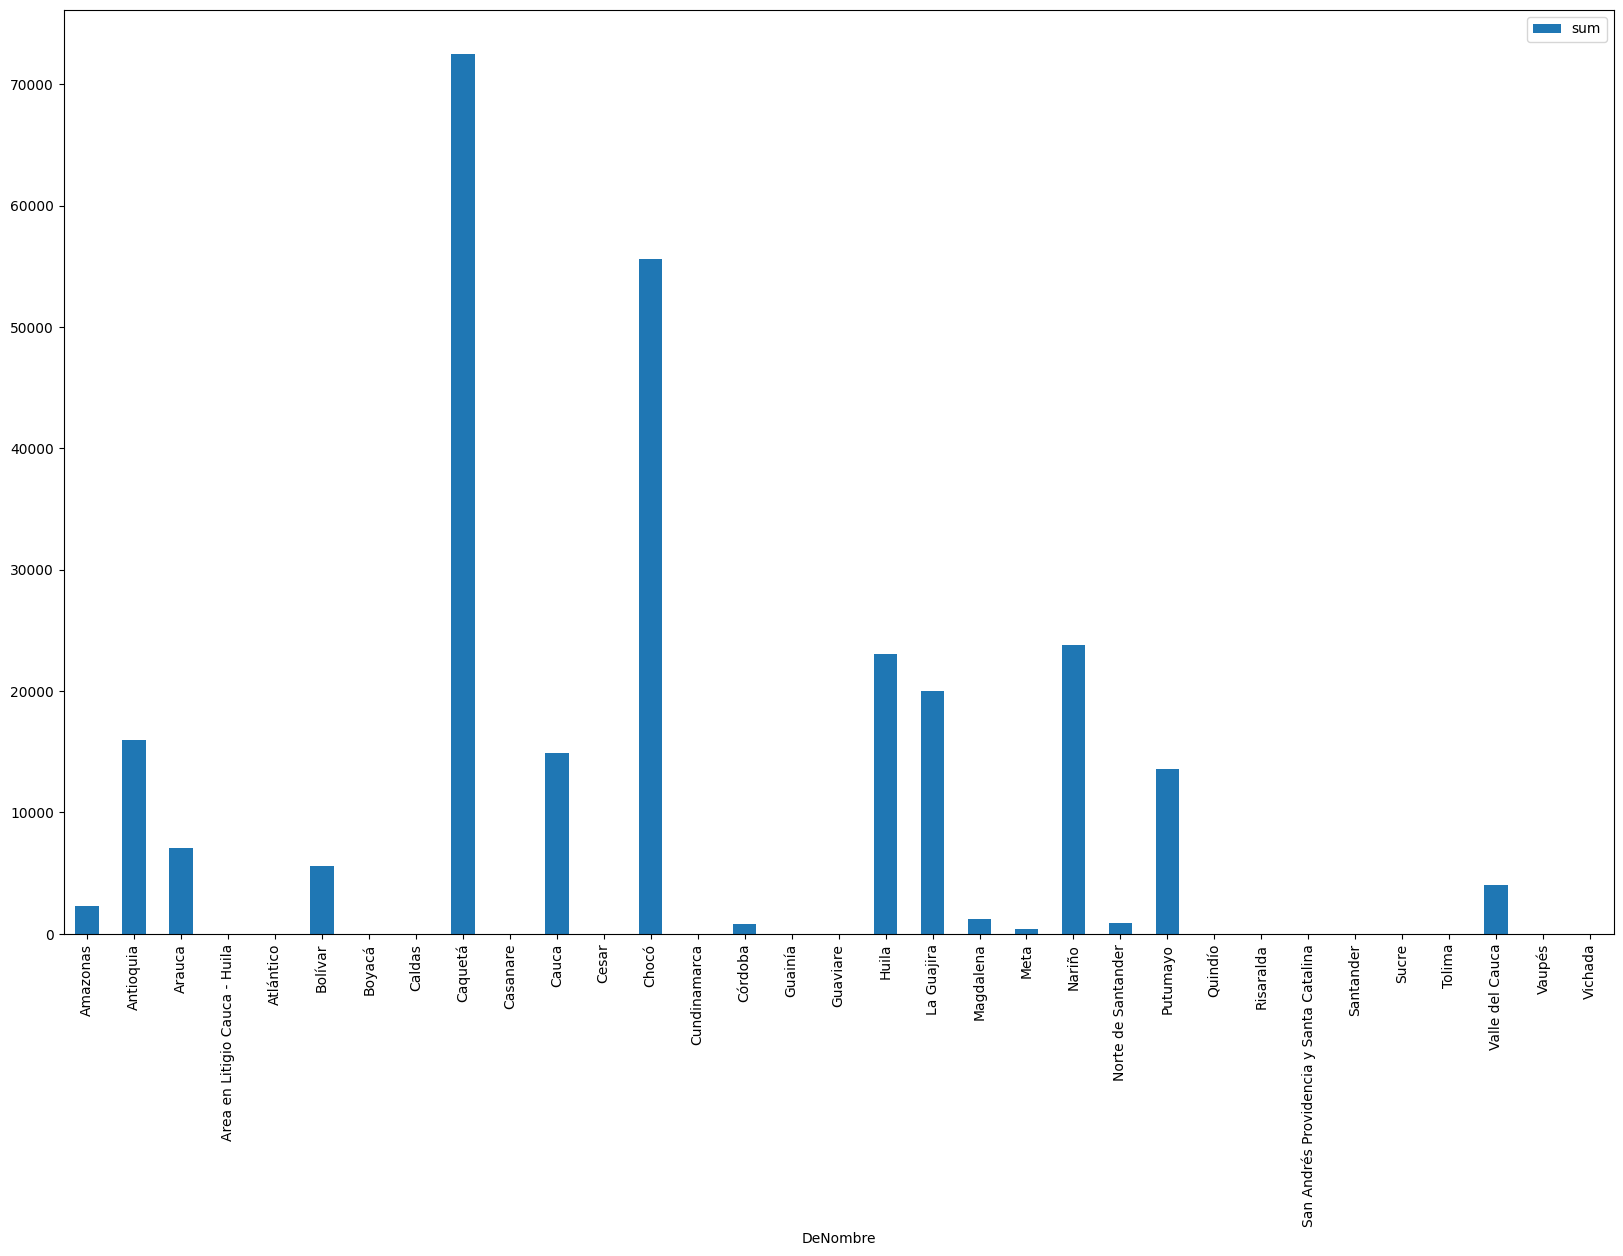

In [44]:
agregados_victimas_dpto = joined_df.groupby('DeNombre')['victimas'].agg(['sum'])
agregados_victimas_dpto.plot(kind="bar",figsize=(20,12))

c:\Users\dafer\Documents\13_udemy\03_codigo\venv\Lib\site-packages\mapclassify\classifiers.py:1592: UserWarning: Not enough unique values in array to form 5 classes. Setting k to 4.
  self.bins = quantile(y, k=k)


<Axes: >

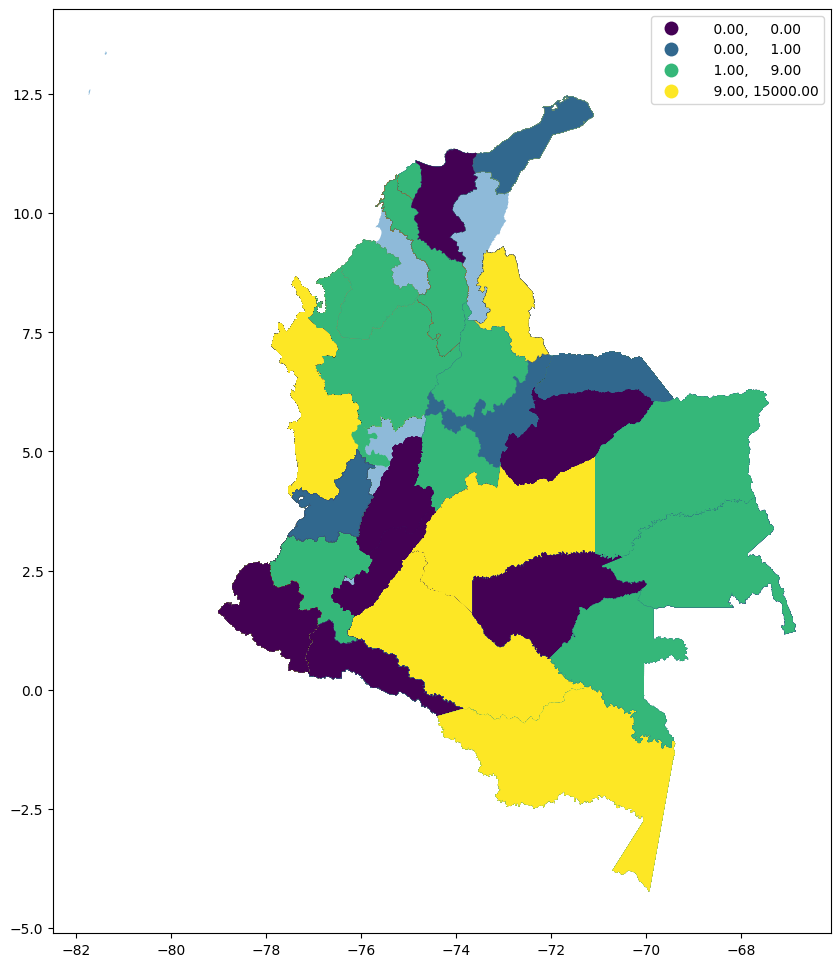

In [45]:
axis = deptos_reproject.plot(figsize=(20,12),alpha=0.5)
joined_df.plot(ax=axis,column='victimas', scheme='QUANTILES', k=5, figsize = (20, 12), legend = True)

In [46]:
joined_df.groupby("DeNombre")["victimas"].mean()

DeNombre
Amazonas                                     80.482759
Antioquia                                    59.170370
Arauca                                       37.850267
Area en Litigio Cauca - Huila                      NaN
Atlántico                                     1.818182
Bolívar                                      60.565217
Boyacá                                        1.500000
Caldas                                             NaN
Caquetá                                    1188.606557
Casanare                                      0.444444
Cauca                                        48.735294
Cesar                                              NaN
Chocó                                       334.765060
Cundinamarca                                  1.200000
Córdoba                                      55.428571
Guainía                                       1.083333
Guaviare                                      0.818182
Huila                                       677.000000
L

In [47]:
joined_df.groupby("DeNombre")["victimas"].min()

DeNombre
Amazonas                                   1.0
Antioquia                                  0.0
Arauca                                     0.0
Area en Litigio Cauca - Huila              NaN
Atlántico                                  1.0
Bolívar                                    0.0
Boyacá                                     0.0
Caldas                                     NaN
Caquetá                                    0.0
Casanare                                   0.0
Cauca                                      0.0
Cesar                                      NaN
Chocó                                      0.0
Cundinamarca                               1.0
Córdoba                                    1.0
Guainía                                    0.0
Guaviare                                   0.0
Huila                                      0.0
La Guajira                                 1.0
Magdalena                                  0.0
Meta                                       0.0
Nari

In [48]:
joined_df.groupby("DeNombre")["victimas"].max()

DeNombre
Amazonas                                     657.0
Antioquia                                   8000.0
Arauca                                      3062.0
Area en Litigio Cauca - Huila                  NaN
Atlántico                                      3.0
Bolívar                                     1799.0
Boyacá                                         3.0
Caldas                                         NaN
Caquetá                                    12020.0
Casanare                                       1.0
Cauca                                       7780.0
Cesar                                          NaN
Chocó                                       8699.0
Cundinamarca                                   2.0
Córdoba                                      700.0
Guainía                                        3.0
Guaviare                                       2.0
Huila                                      15000.0
La Guajira                                 12259.0
Magdalena             

In [49]:
joined_df.groupby("DeNombre")["victimas"].std()

DeNombre
Amazonas                                    157.826899
Antioquia                                   513.262769
Arauca                                      242.793286
Area en Litigio Cauca - Huila                      NaN
Atlántico                                     0.873863
Bolívar                                     218.791350
Boyacá                                        1.290994
Caldas                                             NaN
Caquetá                                    2966.727458
Casanare                                      0.527046
Cauca                                       456.545071
Cesar                                              NaN
Chocó                                      1006.815814
Cundinamarca                                  0.447214
Córdoba                                     185.700219
Guainía                                       0.668558
Guaviare                                      0.750757
Huila                                      2878.429896
L

In [50]:
joined_df.groupby("DeNombre")["victimas"].quantile(0.25)

DeNombre
Amazonas                                   2.00
Antioquia                                  1.00
Arauca                                     1.00
Area en Litigio Cauca - Huila               NaN
Atlántico                                  1.00
Bolívar                                    0.75
Boyacá                                     0.75
Caldas                                      NaN
Caquetá                                    0.00
Casanare                                   0.00
Cauca                                      0.00
Cesar                                       NaN
Chocó                                      0.00
Cundinamarca                               1.00
Córdoba                                    1.00
Guainía                                    1.00
Guaviare                                   0.00
Huila                                      0.00
La Guajira                                 1.00
Magdalena                                  1.00
Meta                           

In [51]:
joined_df.groupby("DeNombre")["victimas"].quantile(0.75)  - joined_df.groupby("DeNombre")["victimas"].quantile(0.25)

DeNombre
Amazonas                                    92.00
Antioquia                                    1.00
Arauca                                       1.00
Area en Litigio Cauca - Huila                 NaN
Atlántico                                    1.50
Bolívar                                     34.50
Boyacá                                       1.50
Caldas                                        NaN
Caquetá                                      2.00
Casanare                                     1.00
Cauca                                        2.00
Cesar                                         NaN
Chocó                                      112.00
Cundinamarca                                 0.00
Córdoba                                      9.75
Guainía                                      0.00
Guaviare                                     1.00
Huila                                        1.00
La Guajira                                   0.00
Magdalena                                

In [52]:
joined_df.groupby("DeNombre")["victimas"].median()

DeNombre
Amazonas                                   30.0
Antioquia                                   1.0
Arauca                                      1.0
Area en Litigio Cauca - Huila               NaN
Atlántico                                   2.0
Bolívar                                     3.0
Boyacá                                      1.5
Caldas                                      NaN
Caquetá                                     1.0
Casanare                                    0.0
Cauca                                       1.0
Cesar                                       NaN
Chocó                                       1.0
Cundinamarca                                1.0
Córdoba                                     2.5
Guainía                                     1.0
Guaviare                                    1.0
Huila                                       1.0
La Guajira                                  1.0
Magdalena                                   1.0
Meta                           

In [53]:
joined_df.describe()

,index_left,victimas,DeArea,Shape_Leng,Shape_Area
count,1891.000000,1891.000000,1897.000000,1.897000e+03,1.897000e+03
mean,950.224749,138.383395,38797.146924,1.658391e+06,3.879715e+10
std,548.081795,872.685194,20985.288622,5.001828e+05,2.098529e+10
min,0.000000,0.000000,49.888768,7.168404e+04,4.988877e+07
25%,477.500000,1.000000,23716.799263,1.389590e+06,2.371680e+10
50%,951.000000,1.000000,30918.668571,1.551194e+06,3.091867e+10
75%,1424.500000,3.000000,48428.101179,2.286068e+06,4.842810e+10
max,1897.000000,15000.000000,108041.181326,2.796471e+06,1.080412e+11


<Axes: xlabel='DeNombre'>

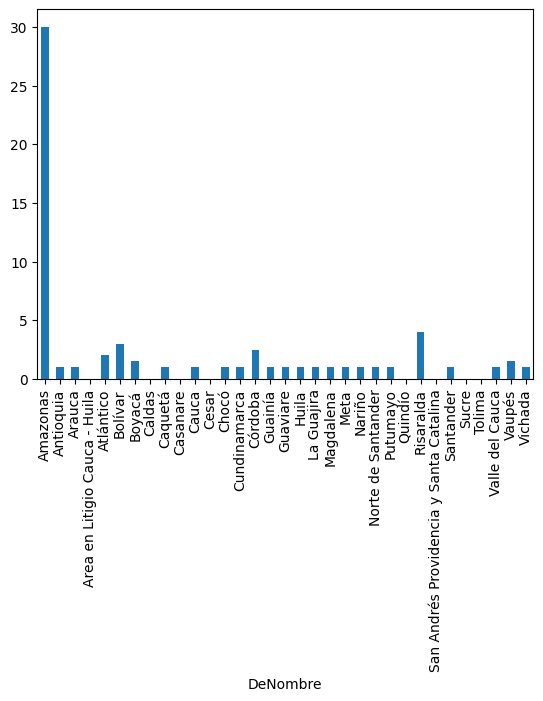

In [54]:
joined_df.groupby("DeNombre")["victimas"].median().plot(kind="bar")

<Axes: xlabel='acciones_fecha', ylabel='acciones_victimas'>

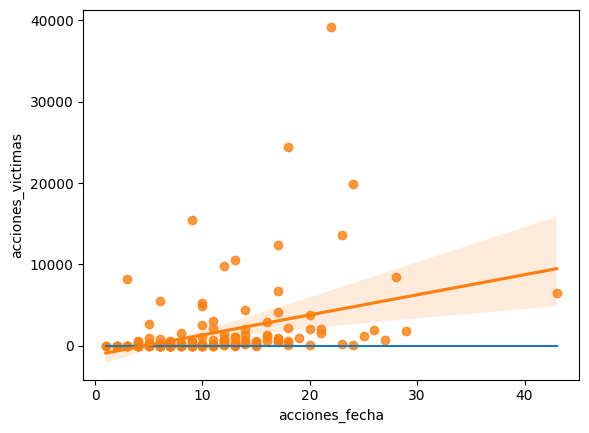

In [55]:
sns.ecdfplot(data=df_conteo,x="acciones_fecha")
sns.regplot(
    data=df_conteo,
    x='acciones_fecha',
    y='acciones_victimas',
)

In [286]:
# df.loc[:,"texto2"] = df["Título evento"] + " " + df["Categorias"]+ " " +df["Subcategorias"]+" "+df["Ocupacion"]+" "+df["Estado"]+" "+df["Condicion"]
df["texto2"] = df.apply(lambda x : x["Descripcion y Resumen Evento"]+" "+x["Subcategorias"]+" "+x["Categorias"]+" "+x["Estado"]+" "+x["Título evento"],axis=1)
df["texto2"] = df["texto2"].str.lower()
df.head()


C:\Users\dafer\AppData\Local\Temp\ipykernel_10732\4927794.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["texto2"] = df.apply(lambda x : x["Descripcion y Resumen Evento"]+" "+x["Subcategorias"]+" "+x["Categorias"]+" "+x["Estado"]+" "+x["Título evento"],axis=1)
C:\Users\dafer\AppData\Local\Temp\ipykernel_10732\4927794.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["texto2"] = df["texto2"].str.lower()


,Id de evento,Tipo,Fecha Evento,Título evento,Descripcion y Resumen Evento,Categorias,Subcategorias,Doble/Multiple Afectacion,Resolucion 1612,Resolucion 1820,...,Tipo de fuente,Nombre de fuente,Fuente,texto2,embedings,ids,embedings1,embs,embeddings,similarrity
0,1,Violencia,2024-01-03,Un soldado muerto y 12 heridos en ataque del C...,.Antioquia-Turbo-miércoles 3 enero 2024,Acciones armadas,Emboscada,No,No,No,...,Prensa,El Tiempo,https://www.eltiempo.com/colombia/medellin/ant...,.antioquia-turbo-miércoles 3 enero 2024 embosc...,0.02856,0,<built-in method tolist of numpy.ndarray objec...,<built-in method tolist of numpy.ndarray objec...,"[-0.06180195, 0.05265981, -0.05399319, -0.0340...",0.314418
1,2,Violencia,2024-01-03,Un soldado muerto y 12 heridos en ataque del C...,.Antioquia-Turbo-miércoles 3 enero 2024,Acciones armadas,Emboscada,No,No,No,...,Prensa,El Tiempo,https://www.eltiempo.com/colombia/medellin/ant...,.antioquia-turbo-miércoles 3 enero 2024 embosc...,0.02856,1,<built-in method tolist of numpy.ndarray objec...,<built-in method tolist of numpy.ndarray objec...,"[-0.061742533, 0.048653394, -0.06011456, -0.03...",0.323281
2,3,Violencia,2024-01-01,Asesinan a migrante venezolana en Medellín,.Antioquia-Medellín-lunes 1 enero 2024,Ataques contra la población civil,Homicidio intencional en persona protegida,No,No,Si,...,Prensa,Alerta Paisa,https://www.alertapaisa.com/noticias/valle-de-...,.antioquia-medellín-lunes 1 enero 2024 homicid...,0.02856,2,<built-in method tolist of numpy.ndarray objec...,<built-in method tolist of numpy.ndarray objec...,"[0.022480022, 0.045534045, -0.056565035, -0.03...",0.337779
3,4,Violencia,2024-01-01,"Asesinan a un hombre en Copacabana, Antioquia",.Antioquia-Copacabana-lunes 1 enero 2024,Ataques contra la población civil,Homicidio intencional en persona protegida,No,No,No,...,Sociedad Civil,Analisisurbano.org,https://analisisurbano.org/lo-mataron-por-defe...,.antioquia-copacabana-lunes 1 enero 2024 homic...,0.02856,3,<built-in method tolist of numpy.ndarray objec...,<built-in method tolist of numpy.ndarray objec...,"[-0.032003142, 0.059635963, 0.012038382, -0.03...",0.331597
4,5,Violencia,2024-01-01,"Asesinan a un hombre en Girardota, Antioquia",.Antioquia-Girardota-lunes 1 enero 2024,Ataques contra la población civil,Homicidio intencional en persona protegida,No,No,No,...,Sociedad Civil,Analisisurbano.org,https://analisisurbano.org/a-oscar-javier-lo-m...,.antioquia-girardota-lunes 1 enero 2024 homici...,0.02856,4,<built-in method tolist of numpy.ndarray objec...,<built-in method tolist of numpy.ndarray objec...,"[-0.05298857, 0.056857355, 0.010525062, -0.060...",0.274348


In [239]:
df.head()

,Id de evento,Tipo,Fecha Evento,Título evento,Descripcion y Resumen Evento,Categorias,Subcategorias,Doble/Multiple Afectacion,Resolucion 1612,Resolucion 1820,...,Tipo de fuente,Nombre de fuente,Fuente,texto2,embedings,ids,embedings1,embs,embeddings,similarrity
0,1,Violencia,2024-01-03,Un soldado muerto y 12 heridos en ataque del C...,.Antioquia-Turbo-miércoles 3 enero 2024,Acciones armadas,Emboscada,No,No,No,...,Prensa,El Tiempo,https://www.eltiempo.com/colombia/medellin/ant...,.Antioquia-Turbo-miércoles 3 enero 2024 Embosc...,0.02856,0,<built-in method tolist of numpy.ndarray objec...,<built-in method tolist of numpy.ndarray objec...,"[0.010168023, 0.045479603, -0.075361945, -0.03...",0.276329
1,2,Violencia,2024-01-03,Un soldado muerto y 12 heridos en ataque del C...,.Antioquia-Turbo-miércoles 3 enero 2024,Acciones armadas,Emboscada,No,No,No,...,Prensa,El Tiempo,https://www.eltiempo.com/colombia/medellin/ant...,.Antioquia-Turbo-miércoles 3 enero 2024 Embosc...,0.02856,1,<built-in method tolist of numpy.ndarray objec...,<built-in method tolist of numpy.ndarray objec...,"[0.019280626, 0.040499695, -0.08732996, -0.032...",0.287197
2,3,Violencia,2024-01-01,Asesinan a migrante venezolana en Medellín,.Antioquia-Medellín-lunes 1 enero 2024,Ataques contra la población civil,Homicidio intencional en persona protegida,No,No,Si,...,Prensa,Alerta Paisa,https://www.alertapaisa.com/noticias/valle-de-...,.Antioquia-Medellín-lunes 1 enero 2024 Homicid...,0.02856,2,<built-in method tolist of numpy.ndarray objec...,<built-in method tolist of numpy.ndarray objec...,"[0.046596173, 0.024703298, -0.106215574, -0.02...",0.338454
3,4,Violencia,2024-01-01,"Asesinan a un hombre en Copacabana, Antioquia",.Antioquia-Copacabana-lunes 1 enero 2024,Ataques contra la población civil,Homicidio intencional en persona protegida,No,No,No,...,Sociedad Civil,Analisisurbano.org,https://analisisurbano.org/lo-mataron-por-defe...,.Antioquia-Copacabana-lunes 1 enero 2024 Homic...,0.02856,3,<built-in method tolist of numpy.ndarray objec...,<built-in method tolist of numpy.ndarray objec...,"[0.031333122, 0.09030326, -0.044636857, -0.036...",0.292247
4,5,Violencia,2024-01-01,"Asesinan a un hombre en Girardota, Antioquia",.Antioquia-Girardota-lunes 1 enero 2024,Ataques contra la población civil,Homicidio intencional en persona protegida,No,No,No,...,Sociedad Civil,Analisisurbano.org,https://analisisurbano.org/a-oscar-javier-lo-m...,.Antioquia-Girardota-lunes 1 enero 2024 Homici...,0.02856,4,<built-in method tolist of numpy.ndarray objec...,<built-in method tolist of numpy.ndarray objec...,"[0.02085002, 0.097346015, -0.04485148, -0.0521...",0.251509


# Uso de la libreria Sentence-Transformes

In [240]:
!pip install -U sentence-transformers

In [241]:
from sentence_transformers import SentenceTransformer, util 
import numpy as np


In [242]:
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

c:\Users\dafer\Documents\13_udemy\03_codigo\venv\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [243]:
texto = " ".join(i for i in df["texto2"])
embeddings = model.encode(texto)


In [244]:
embeddings.shape

(384,)

## Uso de Embeddings para proceso de texto

In [287]:
# mejor forma de embeddings
df["embeddings"] = df["texto2"].apply(lambda x: model.encode(x))
df.head()

C:\Users\dafer\AppData\Local\Temp\ipykernel_10732\75851545.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["embeddings"] = df["texto2"].apply(lambda x: model.encode(x))


,Id de evento,Tipo,Fecha Evento,Título evento,Descripcion y Resumen Evento,Categorias,Subcategorias,Doble/Multiple Afectacion,Resolucion 1612,Resolucion 1820,...,Tipo de fuente,Nombre de fuente,Fuente,texto2,embedings,ids,embedings1,embs,embeddings,similarrity
0,1,Violencia,2024-01-03,Un soldado muerto y 12 heridos en ataque del C...,.Antioquia-Turbo-miércoles 3 enero 2024,Acciones armadas,Emboscada,No,No,No,...,Prensa,El Tiempo,https://www.eltiempo.com/colombia/medellin/ant...,.antioquia-turbo-miércoles 3 enero 2024 embosc...,0.02856,0,<built-in method tolist of numpy.ndarray objec...,<built-in method tolist of numpy.ndarray objec...,"[-0.06180195, 0.05265981, -0.05399319, -0.0340...",0.314418
1,2,Violencia,2024-01-03,Un soldado muerto y 12 heridos en ataque del C...,.Antioquia-Turbo-miércoles 3 enero 2024,Acciones armadas,Emboscada,No,No,No,...,Prensa,El Tiempo,https://www.eltiempo.com/colombia/medellin/ant...,.antioquia-turbo-miércoles 3 enero 2024 embosc...,0.02856,1,<built-in method tolist of numpy.ndarray objec...,<built-in method tolist of numpy.ndarray objec...,"[-0.061742533, 0.048653394, -0.06011456, -0.03...",0.323281
2,3,Violencia,2024-01-01,Asesinan a migrante venezolana en Medellín,.Antioquia-Medellín-lunes 1 enero 2024,Ataques contra la población civil,Homicidio intencional en persona protegida,No,No,Si,...,Prensa,Alerta Paisa,https://www.alertapaisa.com/noticias/valle-de-...,.antioquia-medellín-lunes 1 enero 2024 homicid...,0.02856,2,<built-in method tolist of numpy.ndarray objec...,<built-in method tolist of numpy.ndarray objec...,"[0.022480022, 0.045534045, -0.056565035, -0.03...",0.337779
3,4,Violencia,2024-01-01,"Asesinan a un hombre en Copacabana, Antioquia",.Antioquia-Copacabana-lunes 1 enero 2024,Ataques contra la población civil,Homicidio intencional en persona protegida,No,No,No,...,Sociedad Civil,Analisisurbano.org,https://analisisurbano.org/lo-mataron-por-defe...,.antioquia-copacabana-lunes 1 enero 2024 homic...,0.02856,3,<built-in method tolist of numpy.ndarray objec...,<built-in method tolist of numpy.ndarray objec...,"[-0.032003142, 0.059635963, 0.012038382, -0.03...",0.331597
4,5,Violencia,2024-01-01,"Asesinan a un hombre en Girardota, Antioquia",.Antioquia-Girardota-lunes 1 enero 2024,Ataques contra la población civil,Homicidio intencional en persona protegida,No,No,No,...,Sociedad Civil,Analisisurbano.org,https://analisisurbano.org/a-oscar-javier-lo-m...,.antioquia-girardota-lunes 1 enero 2024 homici...,0.02856,4,<built-in method tolist of numpy.ndarray objec...,<built-in method tolist of numpy.ndarray objec...,"[-0.05298857, 0.056857355, 0.010525062, -0.060...",0.274348


In [246]:

from sklearn.metrics.pairwise import cosine_similarity

## Similitud y Embeddings

In [296]:
pregunta = "homicidio a lideres sociales"
nueva_pregunta = model.encode(pregunta)
df["similarrity"] = df["embeddings"].apply(lambda x: cosine_similarity([nueva_pregunta],[x])[0][0])


C:\Users\dafer\AppData\Local\Temp\ipykernel_10732\2664110267.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["similarrity"] = df["embeddings"].apply(lambda x: cosine_similarity([nueva_pregunta],[x])[0][0])


In [297]:
mas_similares = df.sort_values(by="similarrity",ascending=False).iloc[:100]
mas_similares.head()

,Id de evento,Tipo,Fecha Evento,Título evento,Descripcion y Resumen Evento,Categorias,Subcategorias,Doble/Multiple Afectacion,Resolucion 1612,Resolucion 1820,...,Tipo de fuente,Nombre de fuente,Fuente,texto2,embedings,ids,embedings1,embs,embeddings,similarrity
642,643,Violencia,2024-02-24,Homicídio de lideresa social,.Caquetá-Florencia-sábado 24 febrero 2024,Ataques contra la población civil,Homicidio intencional en persona protegida,No,No,No,...,Prensa,Caqueta al día,Sin Enlace,.caquetá-florencia-sábado 24 febrero 2024 homi...,0.02856,642,<built-in method tolist of numpy.ndarray objec...,<built-in method tolist of numpy.ndarray objec...,"[0.054547194, 0.100836806, -0.07633026, -0.024...",0.742849
129,130,Violencia,2024-01-17,Encuentran el cuerpo sin vida de lider social ...,.Antioquia-Apartadó-miércoles 17 enero 2024,Ataques contra la población civil,Homicidio intencional en persona protegida,No,No,No,...,Prensa,El Colombiano,https://www.elcolombiano.com/antioquia/asesina...,.antioquia-apartadó-miércoles 17 enero 2024 ho...,0.02856,129,<built-in method tolist of numpy.ndarray objec...,<built-in method tolist of numpy.ndarray objec...,"[0.034002453, 0.06259126, -0.055629104, -0.009...",0.629407
1674,1675,Violencia,2024-05-14,"Homicidio de un hombre en Solitá, Caquetá",.Caquetá-Solita-martes 14 mayo 2024,Ataques contra la población civil,Homicidio intencional en persona protegida,No,No,No,...,Prensa,Caqueta al día,https://www.facebook.com/Informativo724Caqueta...,.caquetá-solita-martes 14 mayo 2024 homicidio ...,0.02856,1674,<built-in method tolist of numpy.ndarray objec...,<built-in method tolist of numpy.ndarray objec...,"[-0.025770843, 0.094794065, -0.038225934, -0.0...",0.626833
76,77,Violencia,2024-01-10,Asesinado líder social y comunal en el barrio ...,.Norte De Santander-Cúcuta-miércoles 10 enero ...,Ataques contra la población civil,Homicidio intencional en persona protegida,No,No,No,...,Radio,Caracol,https://caracol.com.co/2024/01/10/asesinado-li...,.norte de santander-cúcuta-miércoles 10 enero ...,0.02856,76,<built-in method tolist of numpy.ndarray objec...,<built-in method tolist of numpy.ndarray objec...,"[0.086765684, 0.04977164, -0.06676958, 0.01161...",0.620377
1883,1884,Violencia,2024-06-04,Homicidio selectivo en Cúcuta,.Norte De Santander-Cúcuta-martes 4 junio 2024,Ataques contra la población civil,Homicidio intencional en persona protegida,No,No,No,...,Prensa,Las Orillas,https://www.laopinion.co/judicial/asesinaron-u...,.norte de santander-cúcuta-martes 4 junio 2024...,0.02856,1883,<built-in method tolist of numpy.ndarray objec...,<built-in method tolist of numpy.ndarray objec...,"[0.090184584, 0.052688975, -0.08312409, -0.025...",0.616940


In [290]:
mas_similares.to_excel("mas_similares.xlsx")

# Combinación Embeddings y Geopandas

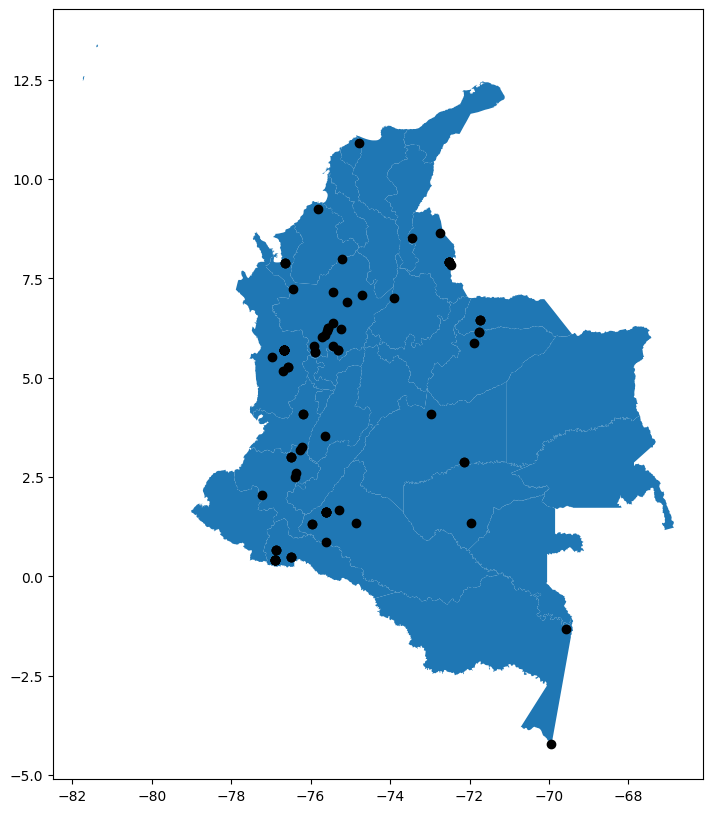

In [298]:
axis = deptos_reproject.plot(figsize=(20,10))
mas_similares_gpd = gpd.GeoDataFrame(mas_similares,geometry=gpd.points_from_xy(mas_similares.Longitud,mas_similares.Latitud))
mas_similares_gpd.plot(ax=axis,color="black");